# Example of the aitlas toolbox in the context of image segmentation

## Import required packages

In [ ]:
from aitlas.datasets import Hollstein_AI4QCDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 58


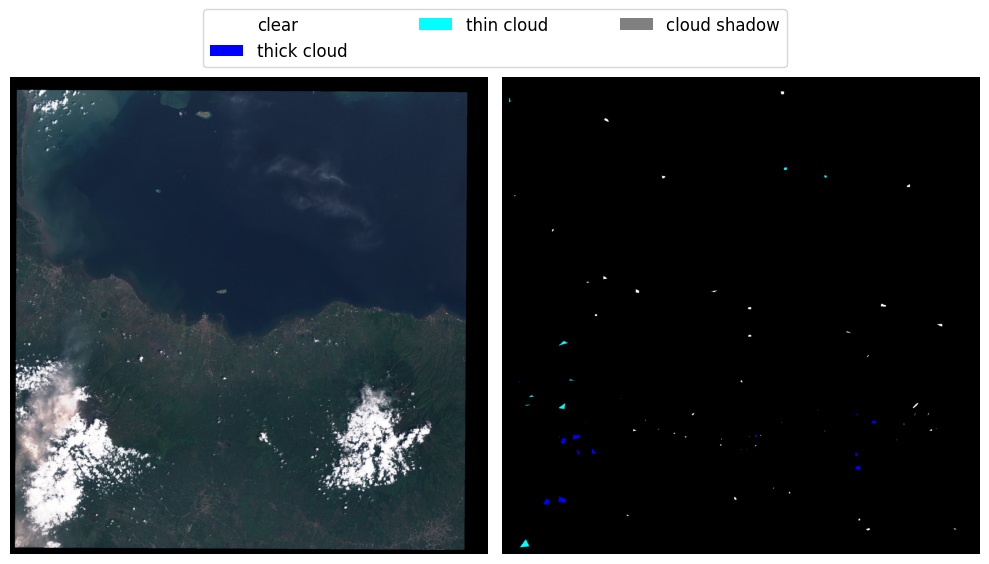

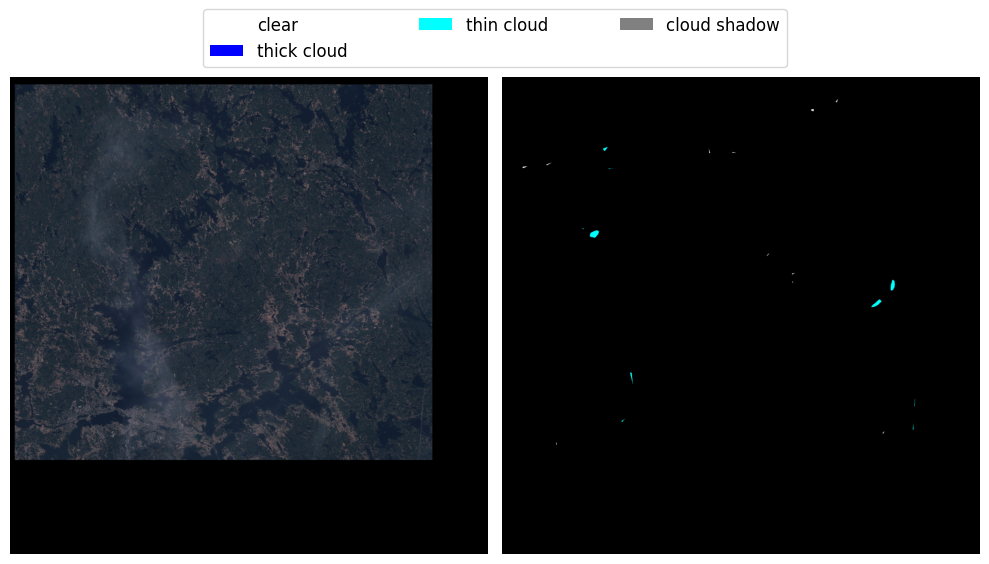

In [9]:
dataset_config = {
    "data_dir": "/home/dragik/data/Hollstein/hollstein_data"
}
dataset = Hollstein_AI4QCDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(12);

In [4]:
dataset.data_distribution_table()

,Number of pixels
clear,243428.0
thick cloud,53888.0
thin cloud,65222.0
cloud shadow,13084.0


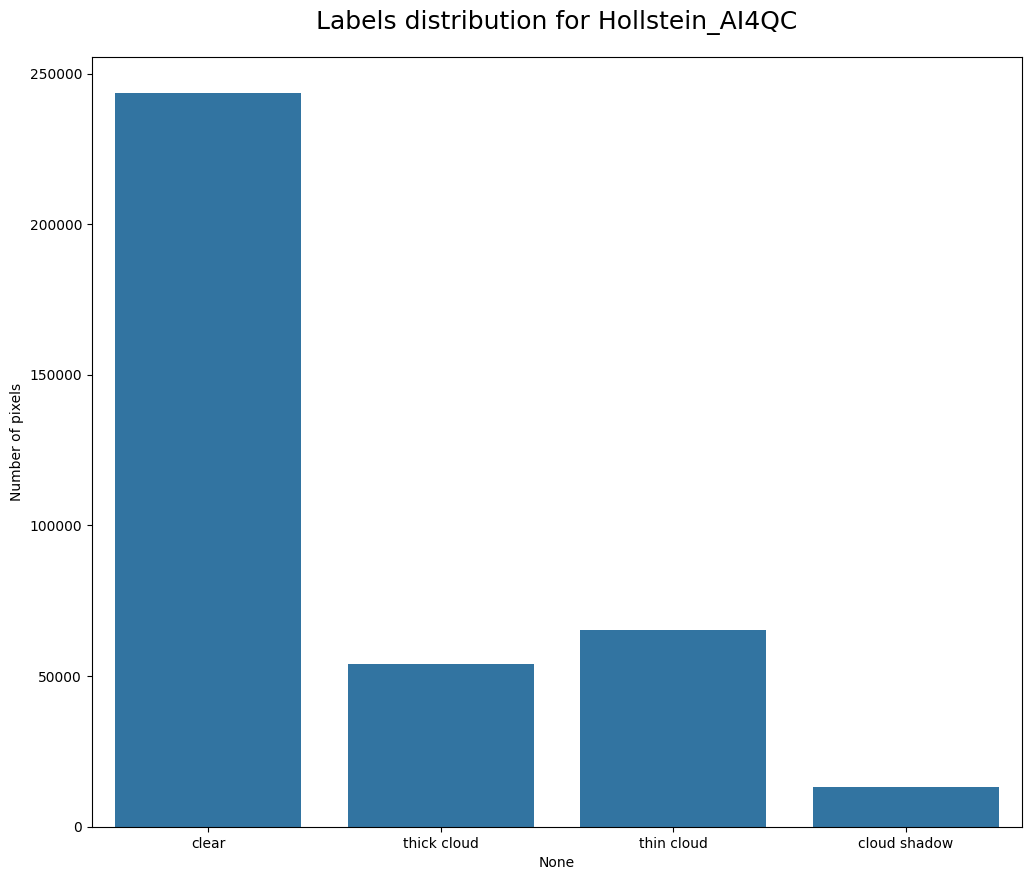

In [5]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [7]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "data_dir": "/home/dragik/data/Hollstein/hollstein_data",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose","aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"]
}
train_dataset = Hollstein_AI4QCDataset(train_dataset_config)
len(train_dataset)

58

## Create the model

In [8]:
epochs = 5
model_directory = "/home/dragik/data/Hollstein/experiments_rgb"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [9]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.27s/it]

epoch: 1, time: 19, loss:  0.99902



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.30s/it]

IOU:0.0001015965507189519, IOU mean:6.970996332465341e-05, IOU per Class:[1.82594412e-04 2.84159838e-05 6.78294574e-05 0.00000000e+00]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:23<00:00,  1.56s/it]

epoch: 2, time: 24, loss:  0.99881



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.45s/it]

IOU:0.00010447420361782665, IOU mean:7.640116831709744e-05, IOU per Class:[2.02848701e-04 2.70114258e-05 7.57445461e-05 0.00000000e+00]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.41s/it]

epoch: 3, time: 21, loss:  0.99854



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.34s/it]

IOU:9.945920199502384e-05, IOU mean:7.385254244449856e-05, IOU per Class:[1.89312843e-04 2.72686507e-05 7.88286765e-05 0.00000000e+00]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.34s/it]

epoch: 4, time: 20, loss:  0.99830



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.32s/it]

IOU:0.00010751132778444566, IOU mean:7.396892070261084e-05, IOU per Class:[1.76883316e-04 3.53283839e-05 8.36639830e-05 0.00000000e+00]



training: 100%|█████████████████████████████████████████████████████████████████████████| 15/15 [00:21<00:00,  1.42s/it]

epoch: 5, time: 22, loss:  0.99809



testing on train set: 100%|█████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.34s/it]

IOU:0.00015516697200470438, IOU mean:0.00010354289820320004, IOU per Class:[2.06812201e-04 4.94996865e-05 1.57859705e-04 0.00000000e+00]


Train loss: [0.9988648727022368, 0.9985594235617539, 0.9983539992365343, 0.998134615092442, 0.9978367398525106]
Validation loss: []
Train time per epochs: [19, 24, 21, 20, 22]
Finished training. training time: 106


# Working with the 13 bands of Sentinel-2

## Load training data

In [6]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/Hollstein/hollstein_data",    
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = Hollstein_AI4QCDataset(train_dataset_config)
len(train_dataset)

58

## Create the model

In [7]:
epochs = 3
model_directory = "/home/dragik/data/Hollstein/experiments_all_bands"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|██████████████████████████████████████████████████████████████████████| 15/15 [1:15:33<00:00, 302.20s/it]

epoch: 1, time: 4533, loss:  0.99902



testing on train set: 100%|██████████████████████████████████████████████████████████| 15/15 [1:15:53<00:00, 303.55s/it]

IOU:6.624229737077729e-05, IOU mean:6.324159220219314e-05, IOU per Class:[1.64458396e-04 2.78183462e-05 6.06896270e-05 0.00000000e+00]



training: 100%|██████████████████████████████████████████████████████████████████████| 15/15 [1:15:16<00:00, 301.11s/it]

epoch: 2, time: 4516, loss:  0.99854



testing on train set: 100%|██████████████████████████████████████████████████████████| 15/15 [1:14:51<00:00, 299.43s/it]

IOU:5.0536673556931765e-05, IOU mean:4.370159091994861e-05, IOU per Class:[1.20926915e-04 1.01602784e-05 4.37191702e-05 0.00000000e+00]



training: 100%|██████████████████████████████████████████████████████████████████████| 15/15 [1:14:44<00:00, 298.97s/it]

epoch: 3, time: 4484, loss:  0.99820



testing on train set: 100%|██████████████████████████████████████████████████████████| 15/15 [1:14:53<00:00, 299.54s/it]

IOU:6.620238430760821e-05, IOU mean:5.7379485553202463e-05, IOU per Class:[1.37991062e-04 5.02945374e-05 4.12323424e-05 0.00000000e+00]


Train loss: [0.9990791472895392, 0.9990724551266638, 0.9988096726351771]
Validation loss: []
Train time per epochs: [4533, 4516, 4484]
Finished training. training time: 13533
